Universidad Simón Bolívar. \\
Departamento de Cómputo Científico. \\
CO-6612, Introducción a Redes Neuronales. \\
TDD 2020. \\
Prof. Minaya Villasana. \\
Amin Arriaga 16-10072. 
# **Tarea 2: El Perceptrón**


In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from random import uniform, shuffle

In [ ]:
# Montamos el drive para obtener los archivos 
# mnist_test.csv   y   mnist_train.csv
from google.colab import drive
drive.mount('/content/drive')

## **Problema 1.**
Demostrar que un perceptrón no puede aprender a clasificar los patrones:

Patrones = $\left[ \begin{array}{crl} 2 & 1 & 3 \\ 6 & 3 & 9 \\ \end{array} \right]$
Deseado = $\left[ \begin{array}{crl} 0 & 1 & 1 \\ \end{array} \right]$

Supongamos por contradicción que un perceptrón es capaz de aprender a clasificar dichos patrones, entonces, existe una recta $y = a*x + b$ capaz de separar los patrones correctamente. Spdg, supongamos que $(\alpha, \beta) \in C_1$ si $\beta \geq a*\alpha + b \hspace{0.3cm}$ y $\hspace{0.3cm} (\alpha, \beta) \in C_0$ si $\beta < a*\alpha + b$. Como los patrones $(2, 6) \in C_0$ y $(1, 3), (3, 9) \in C_1$, entonces
	
$$3 \geq a*1 + b \hspace{3cm} (1)$$
$$9 \geq a*3 + b \hspace{3cm} (2)$$
$$6 < a*2 + b \hspace{3cm} (3)$$
		
Notemos que si multiplicamos (1) por -2, entonces
$$-6 \leq -a*2 - 2*b \hspace{3cm} (4)$$
		
Sumando (4)+(3) obtenemos $ 0 < -b \rightarrow b < 0$
		
Ahora si multiplicamos (3) por $-\frac{3}{2}$ obtenemos
$$-9 > -a*3 -\frac{3}{2}*b \hspace{3cm} (5)$$
		
Sumando (2)+(5) obtenemos $0 > -\frac{1}{2}b \rightarrow b > 0$. Contradicción, pues $b < 0$ y $b > 0$, por lo tanto, no existe ninguna recta que separe correctamente los patrones a clasificar, debido a esto, el perceptrón NO puede aprender esta tarea.

## **Problema 2**
Implementación del algoritmo del Perceptrón para un conjunto de datos y función de transferencia genéricos.

In [ ]:
# Funcion para verificar la cantidad de errores de una red.
def verify(X, Y, W, phi):

  # Obtenemos el numero de datos.
  N = len(X)
  # Numero de errores.
  errors = 0

  for j in range(N):
      # Obtenemos el j-esimo dato.
      x_j = X[j].copy()
      # Agregamos una coordenada para el sesgo.
      x_j = np.append(x_j, 1)
      # Calculamos el resultado de la red.
      A = np.dot(W, x_j)
      y_j = [phi(A[k]) for k in range(len(A))]
      # Obtenemos el resultado correcto.
      d_j = Y[j]
      
      # Si hubo algun resultado erroneo.
      if any(y_j[k] != d_j[k] for k in range(len(y_j))):
          errors += 1

  return errors
  
# Implementacion del perceptron multiple.
def perceptron(X, Y, n, epochs, phi):

  # Obtenemos la dimension de los datos de entrada y salida.
  N_x = len(X[0])
  N_y = len(Y[0])
  # Obtenemos el numero de datos.
  N = len(X)
  # Inicializamos los pesos sinapticos.
  W = np.array([[uniform(-0.05,0.05) for i in range(N_x + 1)] for j in range(N_y)])
  # Precision obtenida en cada epoca
  acc = []
  # Aqui almacenaremos los indices de los datos.
  indexes = [i for i in range(N)]

  for i in range(epochs):
      # Ordenamos aleatoriamente los indices.
      shuffle(indexes)

      for j in indexes:
          # Obtenemos el j-esimo dato.
          x_j = X[j].copy()
          # Agregamos una coordenada para el sesgo.
          x_j = np.append(x_j, 1)
          # Calculamos el resultado de la red.
          A = np.dot(W, x_j)
          y_j = [phi(A[k]) for k in range(len(A))]
          # Obtenemos el resultado correcto.
          d_j = Y[j]
          
          # Si hubo algun resultado erroneo.
          if any(y_j[k] != d_j[k] for k in range(len(y_j))):
              # Actualizamos W.
              W += n*np.outer(d_j-y_j, x_j)

      # Calculamos la precision en esta epoca.
      errors = verify(X, Y, W, phi) 
      new_acc = round((N-errors)/N, 4)
      acc.append(new_acc) 

      print("Epoca: ", i+1, ". Precision: ", new_acc, ". Numero de errores: ", errors)
      if errors == 0:
        break

  return W, acc

In [ ]:
# Definimos las siguientes funciones para probar la implementacion del perceptron.

# Funcion clasificadora d, que toma como argumento X = [x, y, z] y returna 
# la clase de X.
def d(X):
    # CLASE 1  (1, 1):  5z >= 3x+3y-2   y   z >= -2x+10y
    if 5*X[2] >= 3*X[0] + 3*X[1] - 2 and X[2] >= -2*X[0] + 10*X[1]:
        return np.array([1, 1])
    
    
    # CLASE 2  (1, -1):  5z >= 3x+3y-2   y   z < -2x+10y
    elif 5*X[2] >= 3*X[0] + 3*X[1] - 2:
        return np.array([1, 0])
    
    
    # CLASE 3  (-1, 1):  5z < 3x+3y-2   y   z >= -2x+10y
    elif X[2] >= -2*X[0] + 10*X[1]:
        return np.array([0, 1])
    
    
    # CLASE 4  (-1, -1):  5z < 3x+3y-2   y   z < -2x+10y
    else:
        return np.array([0, 0])

# Funcion umbral
def umbral(x):
    if x >= 0:
        return 1
    else:
        return 0

# Generamos un conjunto de datos aleatorios de 3 dimensiones.
def genData(N):
  N = 100
  X = []
  Y = []
  for i in range(N):
    data = np.array([uniform(-100, 100), uniform(-100, 100), uniform(-100, 100)])
    X.append(data)
    Y.append(d(data))
  X = np.array(X)
  Y = np.array(Y)

  return X, Y

# Dado un digito, lo convertimos en un vector canonico.
def digitToCanon(x):
    r = [0]*10
    r[x] = 1
    return np.array(r)

# Leer datos .csv para el problema de los digitos
def readCSV(file):
    with open(file, newline='') as File:  
        reader = csv.reader(File)
        X = []
        Y = []
        for r in reader:
            for i in range(1, len(r)):
                r[i] = float(r[i])/255
            X.append(r)
            Y.append(digitToCanon(int(r.pop(0))))
            
    return np.array(X), np.array(Y)

In [ ]:
# Probamos la implementacion del perceptron.
X, Y = genData(500)
W, acc = perceptron(X, Y, 0.01, 100, umbral)
print("Pesos obtenidos: ")
print(W)

Epoca:  1 . Precision:  0.89 . Numero de errores:  11
Epoca:  2 . Precision:  0.86 . Numero de errores:  14
Epoca:  3 . Precision:  0.98 . Numero de errores:  2
Epoca:  4 . Precision:  0.96 . Numero de errores:  4
Epoca:  5 . Precision:  0.98 . Numero de errores:  2
Epoca:  6 . Precision:  0.99 . Numero de errores:  1
Epoca:  7 . Precision:  0.96 . Numero de errores:  4
Epoca:  8 . Precision:  0.98 . Numero de errores:  2
Epoca:  9 . Precision:  0.99 . Numero de errores:  1
Epoca:  10 . Precision:  0.95 . Numero de errores:  5
Epoca:  11 . Precision:  0.97 . Numero de errores:  3
Epoca:  12 . Precision:  0.99 . Numero de errores:  1
Epoca:  13 . Precision:  0.96 . Numero de errores:  4
Epoca:  14 . Precision:  1.0 . Numero de errores:  0
Pesos obtenidos: 
[[-1.37975411 -1.00889855  2.07214589 -0.02399155]
 [ 0.94004686 -4.64791669  0.45504973  0.06468891]]


In [ ]:
X, Y = genData(100)
errors = verify(X, Y, W, umbral)
N = len(X)
print("Se cometieron ", errors, " errores (", (N-errors)/N, " de precision) con los datos de prueba.")

Se cometieron  1  errores ( 0.99  de precision) con los datos de prueba.


## **Problema 3**
Se usará la implementación del perceptrón para entrenar una red que clasifique dígitos usando los datos de MNIST. Se entrenará la red durante $50$ épocas usando valores de $\eta$ igual a $0.1$, $0.01$ y $0.001$, graficando en cada caso la precisión obtenida en cada época.

In [ ]:
# TAREA 2. PROBLEMA 3.
# Obtenemos los datos de los digitos.
X_train, Y_train = readCSV("/content/drive/My Drive/mnist_train.csv")
X_test, Y_test = readCSV("/content/drive/My Drive/mnist_test.csv")

Epoca:  1 . Precision:  0.7163 . Numero de errores:  17022
Epoca:  2 . Precision:  0.7592 . Numero de errores:  14447
Epoca:  3 . Precision:  0.7501 . Numero de errores:  14991
Epoca:  4 . Precision:  0.7246 . Numero de errores:  16525
Epoca:  5 . Precision:  0.7351 . Numero de errores:  15891
Epoca:  6 . Precision:  0.7655 . Numero de errores:  14069
Epoca:  7 . Precision:  0.7745 . Numero de errores:  13532
Epoca:  8 . Precision:  0.7064 . Numero de errores:  17615
Epoca:  9 . Precision:  0.7438 . Numero de errores:  15375
Epoca:  10 . Precision:  0.7475 . Numero de errores:  15148
Epoca:  11 . Precision:  0.7722 . Numero de errores:  13670
Epoca:  12 . Precision:  0.7015 . Numero de errores:  17911
Epoca:  13 . Precision:  0.7644 . Numero de errores:  14136
Epoca:  14 . Precision:  0.7622 . Numero de errores:  14266
Epoca:  15 . Precision:  0.7589 . Numero de errores:  14466
Epoca:  16 . Precision:  0.7682 . Numero de errores:  13905
Epoca:  17 . Precision:  0.7353 . Numero de error

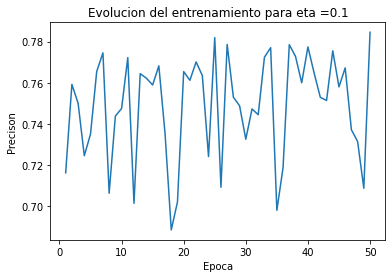

Precision maxima obtenida:  0.7845
Con los datos de prueba se obtuvo una precision de  0.7762


In [ ]:
eta = 0.1
W, acc = perceptron(X_train, Y_train, eta, 50, umbral)
epochs = [i for i in range(1, 51)]
plt.plot(epochs, acc)
plt.xlabel("Epoca")
plt.ylabel("Precison")
plt.title("Evolucion del entrenamiento para eta =" + str(eta))
plt.show()

print("Precision maxima obtenida: ", max(acc))
M = len(X_test)
print("Con los datos de prueba se obtuvo una precision de ", (M - verify(X_test, Y_test, W, umbral))/M)


Epoca:  1 . Precision:  0.7458 . Numero de errores:  15252
Epoca:  2 . Precision:  0.7652 . Numero de errores:  14090
Epoca:  3 . Precision:  0.7327 . Numero de errores:  16036
Epoca:  4 . Precision:  0.7681 . Numero de errores:  13911
Epoca:  5 . Precision:  0.7399 . Numero de errores:  15605
Epoca:  6 . Precision:  0.655 . Numero de errores:  20699
Epoca:  7 . Precision:  0.7589 . Numero de errores:  14466
Epoca:  8 . Precision:  0.7419 . Numero de errores:  15488
Epoca:  9 . Precision:  0.7653 . Numero de errores:  14081
Epoca:  10 . Precision:  0.7686 . Numero de errores:  13886
Epoca:  11 . Precision:  0.7384 . Numero de errores:  15696
Epoca:  12 . Precision:  0.7698 . Numero de errores:  13814
Epoca:  13 . Precision:  0.7582 . Numero de errores:  14505
Epoca:  14 . Precision:  0.7647 . Numero de errores:  14117
Epoca:  15 . Precision:  0.6895 . Numero de errores:  18630
Epoca:  16 . Precision:  0.7711 . Numero de errores:  13737
Epoca:  17 . Precision:  0.7577 . Numero de errore

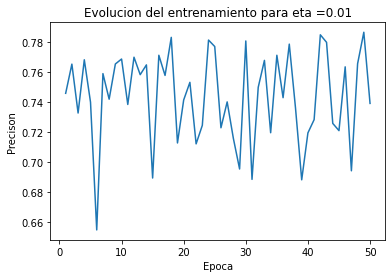

Precision maxima obtenida:  0.7864
Con los datos de prueba se obtuvo una precision de  0.7256


In [ ]:
eta = 0.01
W, acc = perceptron(X_train, Y_train, eta, 50, umbral)
epochs = [i for i in range(1, 51)]
plt.plot(epochs, acc)
plt.xlabel("Epoca")
plt.ylabel("Precison")
plt.title("Evolucion del entrenamiento para eta =" + str(eta))
plt.show()

print("Precision maxima obtenida: ", max(acc))
M = len(X_test)
print("Con los datos de prueba se obtuvo una precision de ", (M - verify(X_test, Y_test, W, umbral))/M)

Epoca:  1 . Precision:  0.6729 . Numero de errores:  19627
Epoca:  2 . Precision:  0.749 . Numero de errores:  15063
Epoca:  3 . Precision:  0.7638 . Numero de errores:  14174
Epoca:  4 . Precision:  0.7177 . Numero de errores:  16936
Epoca:  5 . Precision:  0.7452 . Numero de errores:  15287
Epoca:  6 . Precision:  0.7538 . Numero de errores:  14772
Epoca:  7 . Precision:  0.7461 . Numero de errores:  15235
Epoca:  8 . Precision:  0.774 . Numero de errores:  13562
Epoca:  9 . Precision:  0.7678 . Numero de errores:  13930
Epoca:  10 . Precision:  0.735 . Numero de errores:  15898
Epoca:  11 . Precision:  0.7096 . Numero de errores:  17422
Epoca:  12 . Precision:  0.64 . Numero de errores:  21602
Epoca:  13 . Precision:  0.7218 . Numero de errores:  16695
Epoca:  14 . Precision:  0.7273 . Numero de errores:  16361
Epoca:  15 . Precision:  0.7724 . Numero de errores:  13653
Epoca:  16 . Precision:  0.7484 . Numero de errores:  15097
Epoca:  17 . Precision:  0.7541 . Numero de errores:  

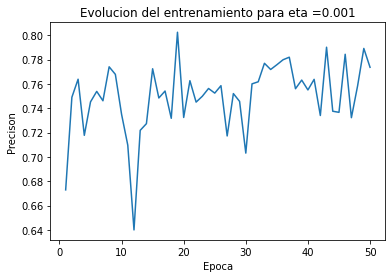

Precision maxima obtenida:  0.8024
Con los datos de prueba se obtuvo una precision de  0.7682


In [ ]:
eta = 0.001
W, acc = perceptron(X_train, Y_train, eta, 50, umbral)
epochs = [i for i in range(1, 51)]
plt.plot(epochs, acc)
plt.xlabel("Epoca")
plt.ylabel("Precison")
plt.title("Evolucion del entrenamiento para eta =" + str(eta))
plt.show()

print("Precision maxima obtenida: ", max(acc))
M = len(X_test)
print("Con los datos de prueba se obtuvo una precision de ", (M - verify(X_test, Y_test, W, umbral))/M)

Podemos notar que en los 3 casos, el comportamiento de la red es inestable (aunque para $\eta = 0.001$ es menos pronunciada), y la precisión siempre ronda entre $0.62$ y $0.8$, lo cual no es muy bueno. Sin embargo, este era el resultado esperado, pues los perceptrones no son capaces de reconocer patrones tan complejos como lo son los dígitos.